In [69]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import re
%matplotlib inline
warnings.filterwarnings('ignore')

## Lendo base de dados em CSV

In [52]:
df = pd.read_csv('1429_1.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


## Análise

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id                      34660 non-null object
name                    27900 non-null object
asins                   34658 non-null object
brand                   34660 non-null object
categories              34660 non-null object
keys                    34660 non-null object
manufacturer            34660 non-null object
reviews.date            34621 non-null object
reviews.dateAdded       24039 non-null object
reviews.dateSeen        34660 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     34066 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      34131 non-null float64
reviews.rating          34627 non-null float64
reviews.sourceURLs      34660 non-null object
reviews.text            34659 non-null object
reviews.title           34655 non-null object
reviews.userCity        0 non-null float64
reviews.userProvince    0

### Como mostra os dados acima, existem 34660 reviews de produtos identificados, mas somente 34658 ids de produto  
### <span style="color:red">TRATAR ISSO</span>

In [54]:
df[['reviews.rating']].describe()

,reviews.rating
count,34627.000000
mean,4.584573
std,0.735653
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Agrupando produtos por média de nota de review  
Isso será usado para facilitar no cálculo da correlação de produtos mais a frente

In [55]:
products = pd.DataFrame(df.groupby('asins')['reviews.rating'].mean())

In [56]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, B002Y27P3M to B01J4ORNHU
Data columns (total 1 columns):
reviews.rating    38 non-null float64
dtypes: float64(1)
memory usage: 656.0+ bytes


In [57]:
products.head()

,reviews.rating
asins,
B002Y27P3M,NaN
B002Y27P6Y,3.500000
B005PB2T0S,4.000000
B005PB2T2Q,3.666667
B006GWO5NE,4.875000


## Identifica quantas avaliações existem por produto e insere no dataframe

In [58]:
products['number_of_ratings'] = df.groupby('asins')['reviews.rating'].count()
products.head()

,reviews.rating,number_of_ratings
asins,,
B002Y27P3M,NaN,0
B002Y27P6Y,3.500000,10
B005PB2T0S,4.000000,5
B005PB2T2Q,3.666667,6
B006GWO5NE,4.875000,8


In [59]:
products.describe()

,reviews.rating,number_of_ratings
count,38.000000,41.000000
mean,4.411462,844.512195
std,0.568281,2142.269919
min,2.461538,0.000000
25%,4.428623,7.000000
50%,4.557075,15.000000
75%,4.705459,372.000000
max,5.000000,10966.000000


## Visualização da distribuição das notas em produtos

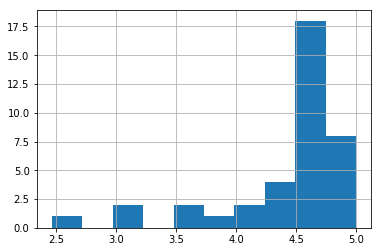

In [60]:
products['reviews.rating'].hist()

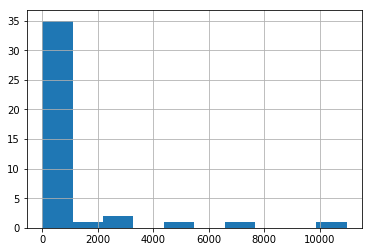

In [61]:
products['number_of_ratings'].hist()

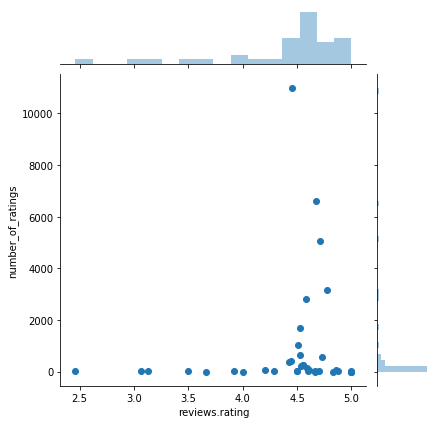

In [62]:
sns.jointplot(x='reviews.rating', y='number_of_ratings', data=products)

## Motor de recomendação
### Criação de uma matriz de produtos com avaliações

In [63]:
df.processed_categories = df.categories.apply(lambda row: row.split(','))
df.processed_categories.head()

0    [Electronics, iPad & Tablets, All Tablets, Fir...
1    [Electronics, iPad & Tablets, All Tablets, Fir...
2    [Electronics, iPad & Tablets, All Tablets, Fir...
3    [Electronics, iPad & Tablets, All Tablets, Fir...
4    [Electronics, iPad & Tablets, All Tablets, Fir...
Name: categories, dtype: object

In [64]:
df = df[['name', 'asins', 'brand', 'categories', 'manufacturer']]
df = df.drop_duplicates(subset=['asins'])
df.head()

,name,asins,brand,categories,manufacturer
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon
2814,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",Amazon
2881,"Amazon Kindle Lighted Leather Cover,,,\r\nAmaz...",B005PB2T0S,Amazon,"Electronics,eBook Readers & Accessories,Covers...",Amazon
2886,"Kindle Keyboard,,,\r\nKindle Keyboard,,,",B002Y27P3M,Amazon,"Kindle Store,Amazon Devices,Electronics",Amazon
2905,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CYG,Amazon,"Tablets,Fire Tablets,Electronics,Computers,Com...",Amazon


In [65]:
df['name'] = df['name'].map(lambda x: re.split(', | \s | \n', str(x).lower()))
df['categories'] = df['categories'].map(lambda x: re.split(', | \&', str(x).lower()))
df.set_index('asins', inplace=True)

In [66]:
df.head()

,name,brand,categories,manufacturer
asins,,,,
B01AHB9CN2,"[all-new fire hd 8 tablet, 8 hd display, wi-fi...",Amazon,"[electronics,ipad, tablets,all tablets,fire t...",Amazon
B00VINDBJK,[kindle oasis e-reader with leather charging c...,Amazon,"[ebook readers,kindle e-readers,computers, ta...",Amazon
B005PB2T0S,"[amazon kindle lighted leather cover,,,\r\nama...",Amazon,"[electronics,ebook readers, accessories,cover...",Amazon
B002Y27P3M,"[kindle keyboard,,,\r\nkindle keyboard,,,]",Amazon,"[kindle store,amazon devices,electronics]",Amazon
B01AHB9CYG,"[all-new fire hd 8 tablet, 8 hd display, wi-fi...",Amazon,"[tablets,fire tablets,electronics,computers,co...",Amazon


In [67]:
df['bow'] = ''
columns = df[['name', 'brand', 'categories', 'manufacturer']].columns
for index, row in df.iterrows():
    words = ''
    for col in columns:
        if col not in ['brand', 'manufacturer']:
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bow'] = words
    
df.drop(columns = [col for col in df.columns if col!= 'bow'], inplace = True)

In [68]:
df.head()

,bow
asins,
B01AHB9CN2,all-new fire hd 8 tablet 8 hd display wi-fi 16...
B00VINDBJK,kindle oasis e-reader with leather charging co...
B005PB2T0S,"amazon kindle lighted leather cover,,,\r\namaz..."
B002Y27P3M,"kindle keyboard,,,\r\nkindle keyboard,,, Amazo..."
B01AHB9CYG,all-new fire hd 8 tablet 8 hd display wi-fi 32...


In [70]:
count = CountVectorizer()
count_matrix = count.fit_transform(df['bow'])

indices = pd.Series(df.index)
indices[:5]

0    B01AHB9CN2
1    B00VINDBJK
2    B005PB2T0S
3    B002Y27P3M
4    B01AHB9CYG
Name: asins, dtype: object

## Matriz de similaridade
$similaridade = cos(\theta) = \dfrac{\boldsymbol{u} \cdot \boldsymbol{v}}{\|{\boldsymbol{u}}\|\|{\boldsymbol{v}}\|} = 
\dfrac{\sum_{i = 1}^n u_iv_i}{\sqrt{\sum_{i = 1}^n u_i^2}\sqrt{\sum_{i = 1}^n v_i^2}}$

In [71]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[ 1.        ,  0.3216121 ,  0.14339019, ...,  0.14740926,
         0.16854997,  0.33658092],
       [ 0.3216121 ,  1.        ,  0.51880524, ...,  0.37249616,
         0.1490712 ,  0.35143175],
       [ 0.14339019,  0.51880524,  1.        , ...,  0.80018803,
         0.26585253,  0.60328004],
       ..., 
       [ 0.14740926,  0.37249616,  0.80018803, ...,  1.        ,
         0.42947785,  0.71469434],
       [ 0.16854997,  0.1490712 ,  0.26585253, ...,  0.42947785,
         1.        ,  0.5547002 ],
       [ 0.33658092,  0.35143175,  0.60328004, ...,  0.71469434,
         0.5547002 ,  1.        ]])

In [72]:
def recommendations(pid, cosine_sim = cosine_sim):
    
    recommended_prds = []
    
    idx = indices[indices == pid].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_5 = list(score_series.iloc[1:6].index)
    
    for i in top_5:
        recommended_prds.append(list(df.index)[i])
        
    return recommended_prds

In [73]:
recommendations('B005PB2T0S')

['B002Y27P6Y', 'B005PB2T2Q', 'B00LW9XOJM', 'B002Y27P3M', 'B01J2G4VBG']